In [1]:
import pandas as pd
import numpy as np
import os
import sys

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"]=300
import seaborn as sns
sns.set(style="darkgrid", palette="muted", color_codes=True)

In [79]:
data_dir = "ensembl_data"
sec = 4

found_num=[]

not_found_num=[]
not_found_ids=[]

no_match_num=[]
no_match_ids=[]

for i in range(sec):
    found = pd.read_csv(os.path.join(data_dir,"ensembl_trans_seq"+str(i+1)+".csv"),index_col=0)
    no_match = np.load(os.path.join(data_dir,"no_match_list"+str(i+1)+".npy"))
    not_found = np.load(os.path.join(data_dir,"not_found_list"+str(i+1)+".npy"))

    found_num.append(len(found))
    not_found_num.append(len(not_found))
    no_match_num.append(len(no_match))

    not_found_ids.extend(not_found)
    no_match_ids.extend(no_match)



In [76]:
print(sum(found_num),sum(not_found_num),sum(no_match_num))

99380 113 6714


In [19]:
for i in range(4):
    tmp_df = pd.read_csv(os.path.join(data_dir,"ensembl_trans_seq"+str(i+1)+".csv"),index_col=0)
    full = tmp_df[tmp_df.isnull().sum(axis=1)==0]
    drop = tmp_df[tmp_df.isnull().sum(axis=1)!=0]

    if i==0:
        full_tot = full
        drop_tot = drop
    else:
        full_tot = pd.concat([full_tot,full])
        drop_tot = pd.concat([drop_tot,drop])


In [77]:
print(full_tot.shape,drop_tot.shape)

(75234, 9) (24146, 5)


In [21]:
full_tot.to_csv(os.path.join(data_dir,"full_found_trans.csv"))
drop_tot.to_csv(os.path.join(data_dir,"drop_trans.csv"))

In [23]:
utr_db = pd.read_csv("data/homo_sapience_utr.csv",index_col=0)

In [51]:
full_tot["five_length"]=list(map(len,full_tot["fiveprime"].values))
full_tot["three_length"]=list(map(len,full_tot["threeprime"].values))
full_tot["cds_length"]=list(map(len,full_tot["cds"].values))
full_tot["total_length"]=full_tot["five_length"]+full_tot["three_length"]+full_tot["cds_length"]


In [64]:
full_tot[["five_length","three_length","cds_length"]].describe()

,five_length,three_length,cds_length
count,75234.000000,75234.000000,75234.000000
mean,225.090903,1321.943829,1402.947045
std,265.970175,1644.314630,1628.249163
min,1.000000,1.000000,3.000000
25%,72.000000,289.000000,486.000000
50%,152.000000,729.000000,1032.000000
75%,287.000000,1775.000000,1782.000000
max,7720.000000,32870.000000,107976.000000


In [70]:
full_tot.sort_values("cds_length",ascending=False)

,trans_id,gene,fiveprime,threeprime,cds,five_length,three_length,cds_length,total_length
23201,ENST00000589042,TTN,GAGCAGTCGTGCATTCCCAGCCTCGCCTCGGGTGTAGGGATTGCAT...,GAGGGCCTGTGCCCTTATACTCTACACTCATTCTTAACTTTTCGCA...,ATGACAACTCAAGCACCGACGTTTACGCAGCCGTTACAAAGCGTTG...,225,1023,107976,109224
23890,ENST00000591111,TTN,GAGCAGTCGTGCATTCCCAGCCTCGCCTCGGGTGTAGGGATTGCAT...,GAGGGCCTGTGCCCTTATACTCTACACTCATTCTTAACTTTTCGCA...,ATGACAACTCAAGCACCGACGTTTACGCAGCCGTTACAAAGCGTTG...,225,1023,103053,104301
13036,ENST00000342992,TTN,GAGCAGTCGTGCATTCCCAGCCTCGCCTCGGGTGTAGGGATTGCAT...,GAGGGCCTGTGCCCTTATACTCTACACTCATTCTTAACTTTTCGCA...,ATGACAACTCAAGCACCGACGTTTACGCAGCCGTTACAAAGCGTTG...,225,1023,100272,101520
16868,ENST00000460472,TTN,GAGCAGTCGTGCATTCCCAGCCTCGCCTCGGGTGTAGGGATTGCAT...,GAGGGCCTGTGCCCTTATACTCTACACTCATTCTTAACTTTTCGCA...,ATGACAACTCAAGCACCGACGTTTACGCAGCCGTTACAAAGCGTTG...,225,1023,80781,82029
995,ENST00000397910,MUC16,AAGCGTTGCACAATTCCCCCAACCTCCATACATACGGCAGCTCTTC...,CTGGAACTTGCCGGTGCCTGGGGTGCCTTTCCCCCAGCCAGGGTCC...,ATGCTGAAACCCTCAGGCCTTCCTGGGTCATCTTCTCCCACCCGCT...,204,88,43524,43816
...,...,...,...,...,...,...,...,...,...
6908,ENST00000636197,ATP1A3,TGTGTGCGGAGATCCGCGAGGTTGTGGGCCAGCCCTCAGCATCTCC...,TGCACAGTTGCATGACAAGAAAGATGACAAGGACTCACCCAAGAAG...,ATG,66,100,3,169
2348,ENST00000602051,MRLN,ACA,GGTGGCCGGGCAGAGACGCTCCTCACTTCCTAGACAGGATGACGGC...,ATG,3,280,3,286
17816,ENST00000467006,TIRAP,AGCCCGCGCAGTCCGCGCAGCCCTCATCGCAACTGGGCCCGCGCGC...,GCGTCTTGGATTCCAGGAAGTAGGCAGTGTGTATGGTTACTGGAAT...,ATG,96,468,3,567
12355,ENST00000546961,SCN8A,ACAGACGAGAACACTGAGGTTTGGAGAGGTTGTTACACCCTTTTTC...,CTCATGCCTACTTTACAGATGGACAGACTGAGGATCGGAAAGACTG...,ATG,158,304,3,465


In [65]:
full_tot.to_csv(os.path.join(data_dir,"full_found_trans.csv"))
drop_tot.to_csv(os.path.join(data_dir,"drop_trans.csv"))

<AxesSubplot:>

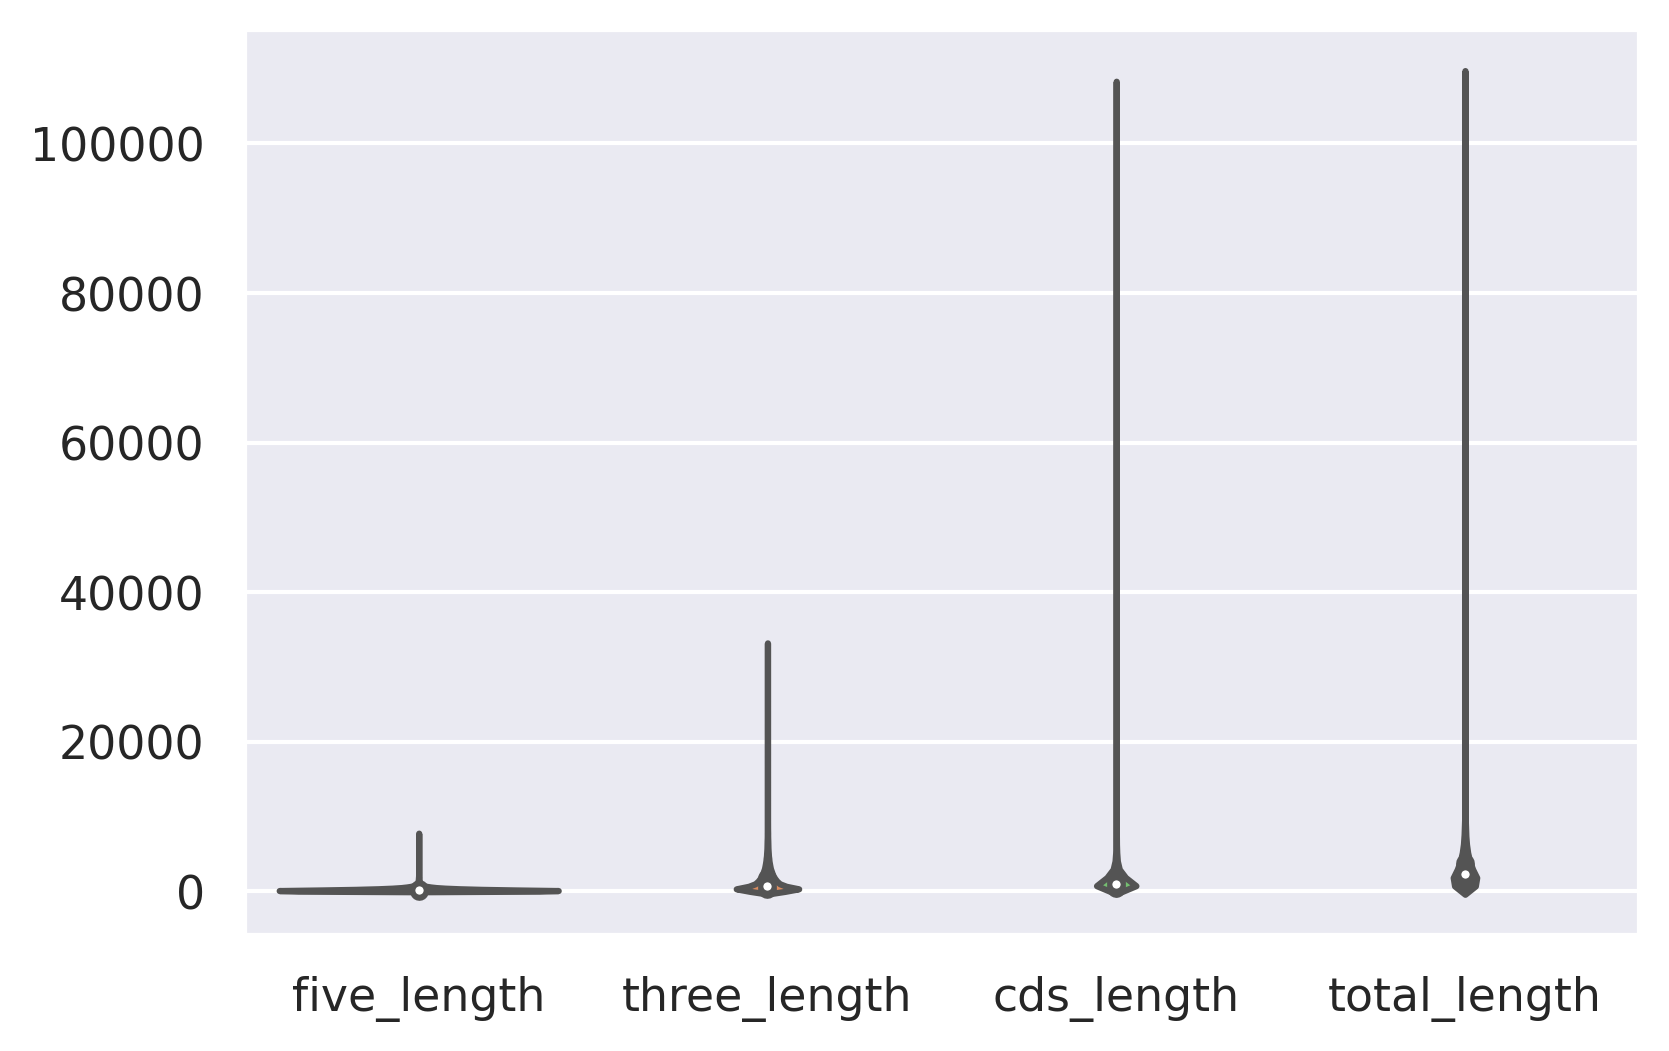

In [61]:
sns.violinplot(data=full_tot)

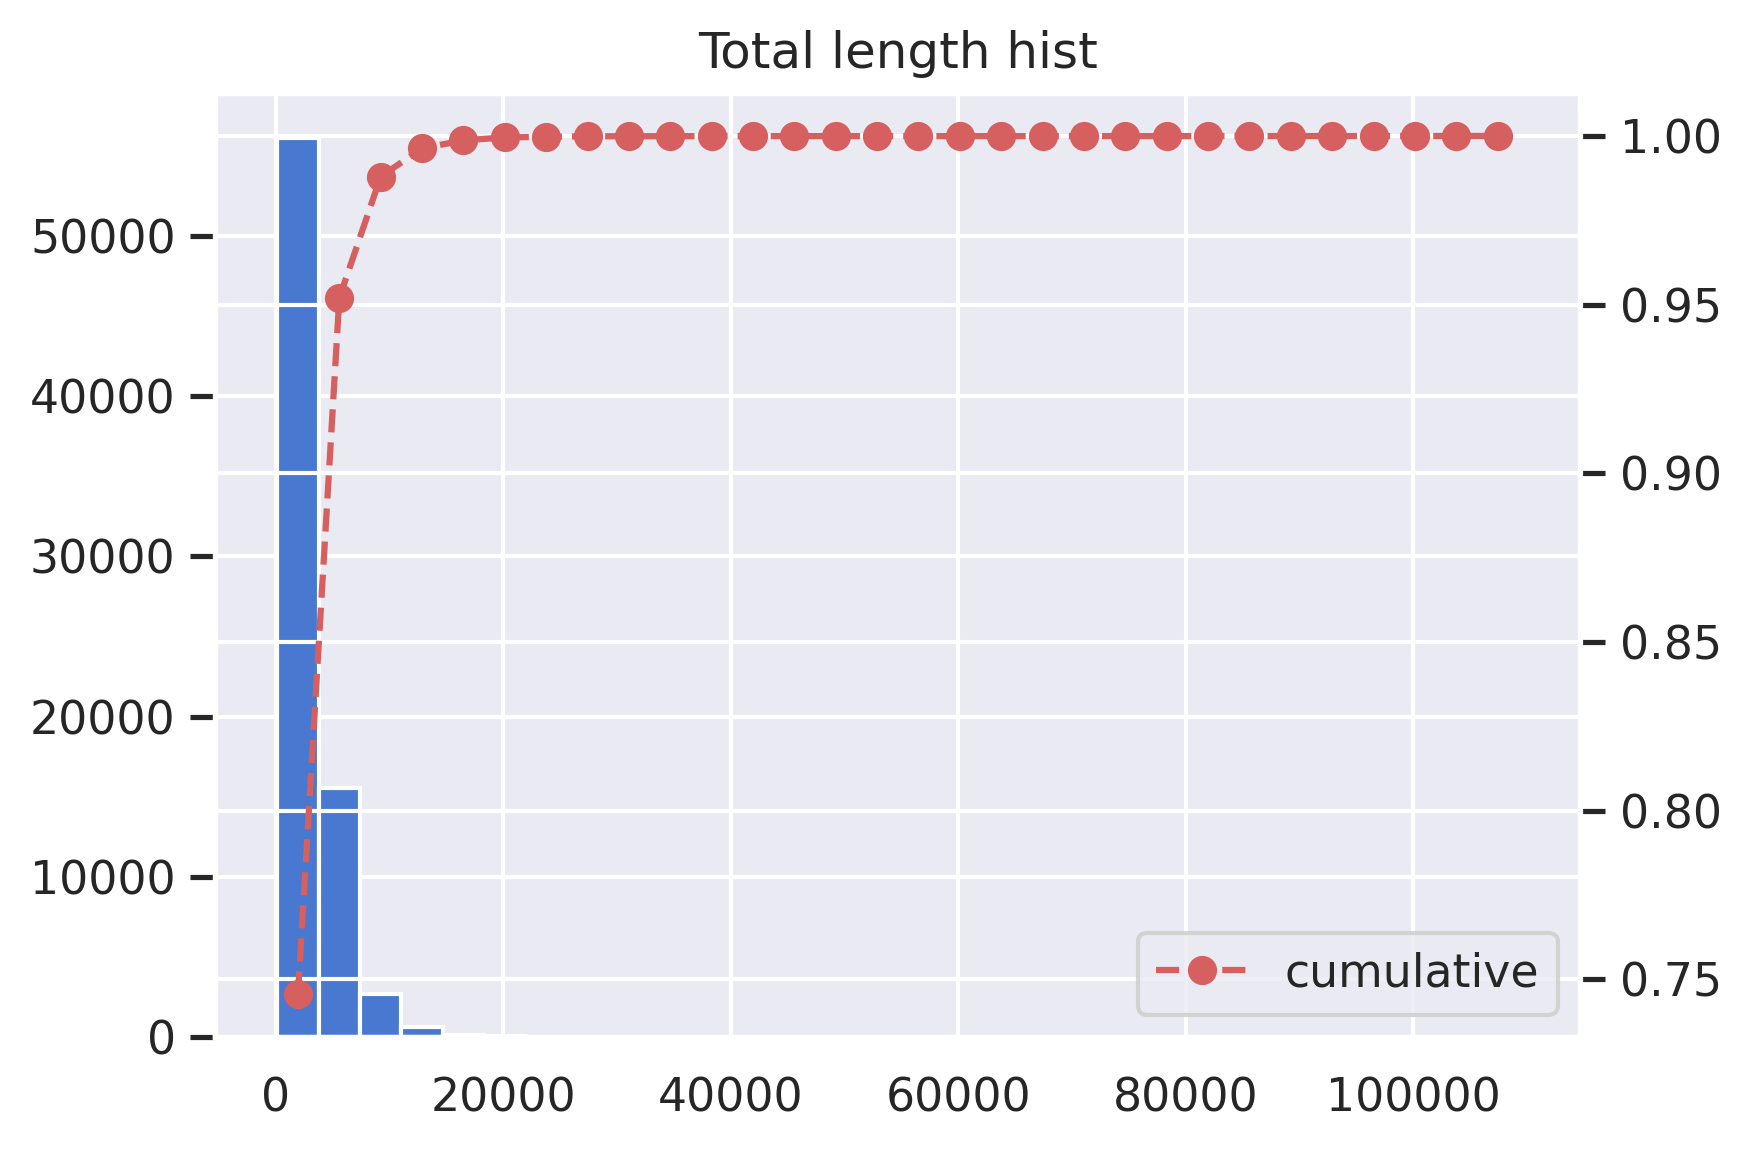

In [74]:
fig,ax1 = plt.subplots()
#utr_short = full_tot[full_tot["cds_length"]<10000]
utr_short = full_tot

ax1.set_title("Total length hist")
n,bins,patches = plt.hist(utr_short["total_length"].values,bins=30)

y2 = np.add.accumulate(n) / n.sum()
x2 = np.convolve(bins, np.ones(2) / 2, mode="same")[1:]

ax2 = ax1.twinx()
lines = ax2.plot(x2,y2,ls="--",color="r",marker="o",label="cumulative")
#plt.text(800,50000,f"min={minlen}\nmax={maxlen}\nmean={mean:.2f}")
plt.legend()
plt.tight_layout()
plt.savefig("Total_length_histcum",facecolor="white")
plt.show()
#ax.set_xscale("log")

In [78]:
full_tot[full_tot["total_length"]<20000].sort_values("total_length").shape

(75168, 9)

In [85]:
no_match_df = pd.DataFrame(None)
for id in no_match_ids:
    
    no_match_tmp = utr_db[utr_db["Transcript"]==id]
    no_match_df=pd.concat([no_match_df,no_match_tmp])


In [88]:
np.unique(no_match_df["UTR"],return_counts=True)

(array(['five_prime_utr', 'three_prime_utr'], dtype=object),
 array([    3, 19365]))

In [97]:
utr_db[utr_db["Gene"]=="ITGA3"]

,UTR,seq,Transcript,Gene,Start,End,Length,Strand,Chrom
84107,three_prime_utr,ATGAACAAATAAATGAATGATGCGCATTTGTGTGTGGAGGGGAGGC...,ENST00000504417,ITGA3,50081127,50081193,67,+,17
84108,three_prime_utr,GATTACAGAGACTTTGACCGAGTCCGGGTAAATGGCTGGGCTACCC...,ENST00000504417,ITGA3,50081310,50081380,71,+,17
84109,three_prime_utr,CGTCCTCCCTGATCCCACCCCCTCCTCCCCCAGTGTCCCCTTTCTT...,ENST00000007722,ITGA3,50089266,50089729,464,+,17
84110,five_prime_utr,TTTTTCTCTTTCCCCGGAAGGAAAGCGCAGCCCGGGCTGGGCTCGCAAG,ENST00000506401,ITGA3,50055968,50056016,49,+,17
84111,five_prime_utr,CC,ENST00000506401,ITGA3,50056438,50056439,2,+,17
84112,three_prime_utr,TTCAGCGCAAGGAGTGGGACTTATCTGAGTATAGTTACAAGGACCC...,ENST00000506401,ITGA3,50070859,50070930,72,+,17
84113,three_prime_utr,GGTACACGATGCAGGTAGGCAGCTTCATCCTGCACCCCAAAAACAT...,ENST00000506401,ITGA3,50071311,50071518,208,+,17
84114,three_prime_utr,GTGGCAGGACCTCCTGGTGGGCGCCCCCTACTACTTCGAGAGGAAA...,ENST00000506401,ITGA3,50071986,50072182,197,+,17
84115,three_prime_utr,ATATTGCTGTGGGAGCTCCGTTTGAAGGCTTGGGCAAAGTGTACAT...,ENST00000506401,ITGA3,50073916,50074004,89,+,17
84116,three_prime_utr,GTAATCCATGGAGAGAAGCTGGGACTGCCTGGGTTGGCCACCTTCG...,ENST00000506401,ITGA3,50074144,50074280,137,+,17


In [93]:
import requests, sys
 
trans_id = "ENST00000007722"

server = "https://rest.ensembl.org"
ext_cds = f"/sequence/id/{trans_id}?type=cds"
ext_cdna = f"/sequence/id/{trans_id}?type=cdna"

r_cds = requests.get(server+ext_cds, headers={ "Content-Type" : "text/x-fasta"})
r_cdna =  requests.get(server+ext_cdna, headers={ "Content-Type" : "text/x-fasta"})
  
cds = "".join(r_cds.text.split("\n")[1:-1])
cdna = "".join(r_cdna.text.split("\n")[1:-1])

In [3]:
full_tot = pd.read_csv("ensembl_data/full_found_trans.csv",index_col=0)

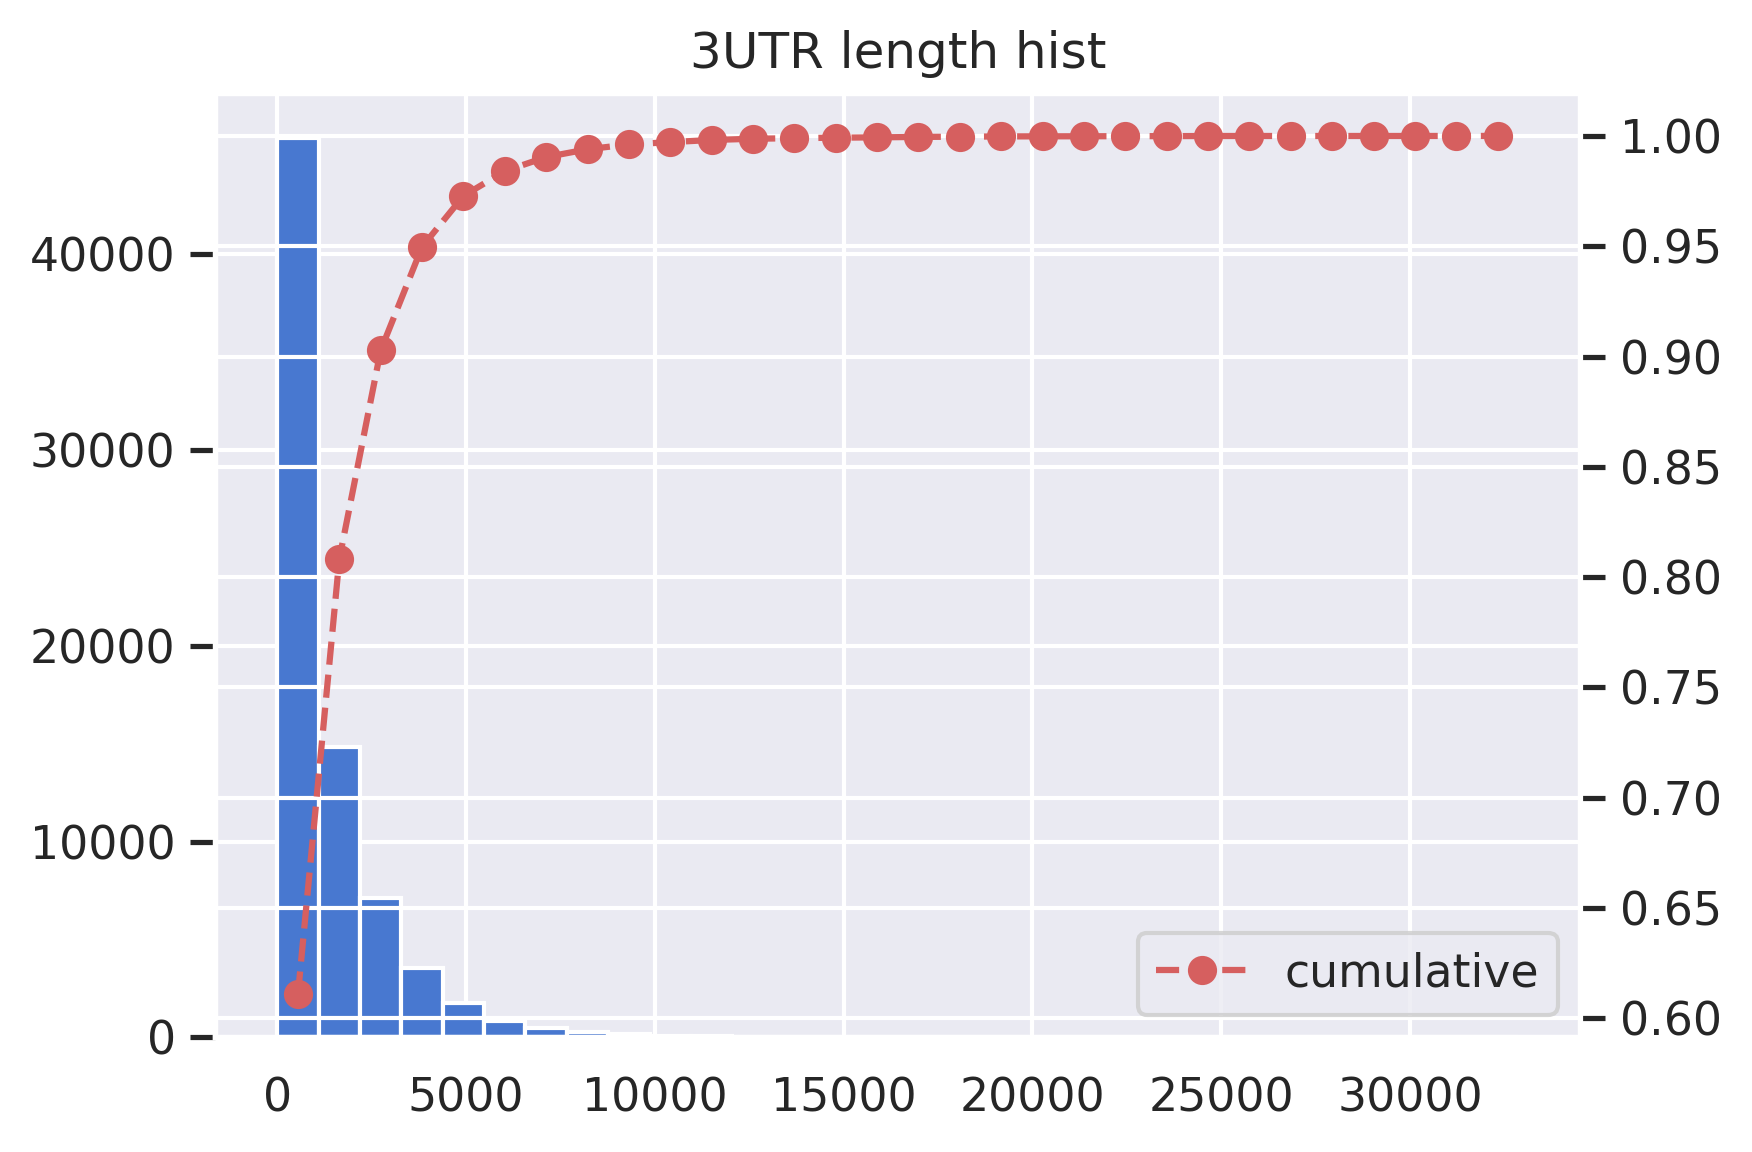

In [6]:
fig,ax1 = plt.subplots()
#utr_short = full_tot[full_tot["cds_length"]<10000]
utr_short = full_tot

ax1.set_title("3UTR length hist")
n,bins,patches = plt.hist(utr_short["three_length"].values,bins=30)

y2 = np.add.accumulate(n) / n.sum()
x2 = np.convolve(bins, np.ones(2) / 2, mode="same")[1:]

ax2 = ax1.twinx()
lines = ax2.plot(x2,y2,ls="--",color="r",marker="o",label="cumulative")
#plt.text(800,50000,f"min={minlen}\nmax={maxlen}\nmean={mean:.2f}")
plt.legend()
plt.tight_layout()
plt.savefig("3UTR_length_histcum",facecolor="white")
plt.show()
#ax.set_xscale("log")

## Parallel coordinate

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import plotting

In [5]:
data = pd.read_csv("data/ensembl_data/full_found_trans.csv",index_col=0)
data

,trans_id,gene,fiveprime,threeprime,cds,five_length,three_length,cds_length,total_length
0,ENST00000000233,ARF5,CTGCTGCTGCTGCGCCCCATCCCCCCGCGGCCGGCCAGTTCCAGCC...,CCAGCCAGGGGCAGGCCCCTGATGCCCGGAAGCTCCTGCGTGCATC...,ATGGGCCTCACCGTGTCCGCGCTCTTTTCGCGGATCTTCGGGAAGA...,88,401,543,1032
1,ENST00000000412,M6PR,AGAGTGGGGCACAGCGAGGCGCTAGGGGGAACGCTGGCCTCTGAAA...,ATTGCACTTTATATGTCCAGCCTCTTCCTCAGTCCCCCAAACCAAA...,ATGTTCCCTTTCTACAGCTGCTGGAGGACTGGACTGCTACTACTAC...,159,1457,834,2450
2,ENST00000000442,ESRRA,GTCAGCTGGAGGAAGCGGAGTAGGAAGCGGCCGCGATGTCCTTTTG...,GGCAAGGGGTGGGACTGGTGGGGGTTCTGGCAGGACCTGCCTAGCA...,ATGTCCAGCCAGGTGGTGGGCATTGAGCCTCTCTACATCAAGGCAG...,225,777,1272,2274
3,ENST00000001008,FKBP4,CCTACCCCAGCTCTCGCGCCGCGTGCAGAGGTGCTCAAGCCTCCTC...,CCCCTCTCCACCAGCCCTACTCCTGCGGCTGCCTGCCCCCCAGTCT...,ATGACAGCCGAGGAGATGAAGGCGACCGAGAGCGGGGCGCAGTCGG...,170,2165,1380,3715
4,ENST00000001146,CYP26B1,ACAGCCAATCCCCCGAGCGGCCGCCAAC,CCCAAGACCCACCCGCCTCAGCCCAGCCCAGGCAGCGGGGTGGTGG...,ATGCTCTTTGAGGGCTTGGATCTGGTGTCGGCGCTGGCCACCCTCG...,28,2989,1539,4556
...,...,...,...,...,...,...,...,...,...
24635,ENST00000703354,PPP2CA,GCGGAGGAGGAGGCGCAGCGGCCGACGGCCGAGTACTGCGGTGAGA...,TGAAATTTTAAACTTGTACAGTATTGCCATGAACCATATATCGACC...,ATGGACGAGAAGGTGTTCACCAAGGAGCTGGACCAGTGGATCGAGC...,182,3737,954,4873
24636,ENST00000703358,FAR1,TCAAA,ATATTTCACAAGTAATTCTTGGGTTTGGAATACTGAGAATGTCAAT...,ATGGTTTCAATCCCAGAATACTATGAAGGCAAGAACGTCCTCCTCA...,5,1109,1173,2287
24637,ENST00000703407,BTK,CTCTCTGGACTGTAAGAATATGTCTCCAGGGCCAGTGTCTGCTGCG...,GCTCGCCAATAAGCTTCTTGGTTCTACTTCTCTTCTCCACAAGCCC...,ATGGCCGCAGTGATTCTGGAGAGCATCTTTCTGAAGCGATCCCAAC...,313,438,1452,2203
24638,ENST00000703410,IL2RB,GCCAGAGCTCAGCAGGGCCCTGGAGAGATGGCCACGGTCCCAGCAC...,CGATCCTCGATCCTCCGTGATCCATCCATTATTGAATCCCAGCACC...,ATGGCGGCCCCTGCTCTGTCCTGGCGTCTGCCCCTCCTCATCCTCC...,128,427,969,1524


In [9]:
plotting.parallel_coordinates(data,cols=["five_length","three_length","cds_length","total_length"])

TypeError: parallel_coordinates() missing 1 required positional argument: 'class_column'

In [ ]:
data["cls"]=np.arange(np.arange(len()))